## Logistic regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [2]:
datafile = 'ex2/ex2data1.txt'
data = np.loadtxt(datafile, delimiter=',', usecols=(0,1,2), unpack=True)

In [3]:
X = np.column_stack((data[0], data[1]))
y = data[2].reshape(100, 1)

In [4]:
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

In [5]:
# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [6]:
# Create linear regression object
classifier = OneVsRestClassifier(LogisticRegression())

In [7]:
# Train the model using the training sets
classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [8]:
coef = classifier.coef_
intercept = classifier.intercept_

print "Coefficient: ", coef
print 'Intercept" ', intercept
print "Residual sum of squares: %.2f" % np.mean((classifier.predict(X_test) - y_test) ** 2)
print 'Variance score: %.2f' % classifier.score(X_test, y_test)

Coefficient:  [[ 0.03218681  0.02895144]]
Intercept"  [[-3.55005506]]
Residual sum of squares: 0.22
Variance score: 0.95


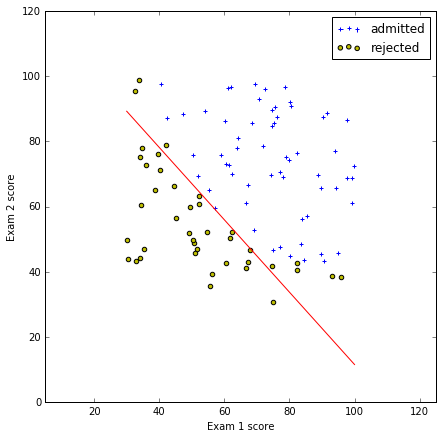

In [9]:
admitted = y == 1
rejected = y == 0

plt.figure(figsize=(7, 7))
plt.scatter(np.extract(admitted, data[0]), 
            np.extract(admitted, data[1]), 
            c='b', marker='+', label='admitted')
plt.scatter(np.extract(rejected, data[0]), 
            np.extract(rejected, data[1]), 
            c='y', marker='o', label='rejected')
plt.xlabel('Exam 1 score');
plt.ylabel('Exam 2 score');
plt.axes().set_aspect('equal', 'datalim')
plt.legend();

ex1 = np.linspace(30, 100, 100)
ex2 = -(coef[:, 0] * ex1 + intercept[:, 0]) / coef[:,1]
plt.plot(ex1, ex2, color='r', label='decision boundary');

In [10]:
theta = np.concatenate((intercept[0], coef[0]), axis=0)
freq = 1 / (1 + np.exp(-1 * np.dot(theta, [1, 45, 85])))
print "For a student with scores 45 and 85, we predict an admission probability of %f" % freq

For a student with scores 45 and 85, we predict an admission probability of 0.588853
